In [49]:
import random
import itertools

import requests
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [50]:
# load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [51]:
# get sample from test data
r = random.randrange(len(x_test))
sample = x_test[r]
print(y_test[r])

7


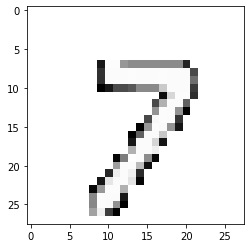

In [52]:
# show sample
two_d = (np.reshape(sample, (28, 28)) * 255).astype(np.uint8)
plt.imshow(two_d, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [53]:
# prepare payload
data = sample.reshape((784))
payload = {"data": {
    "names": ["a", "b"],
    "tensor": {
        "shape": [1, 784],
        "values": data.tolist()
    }}}

In [54]:
endpoint = !kubectl get svc --namespace default ambassador -o jsonpath='{.status.loadBalancer.ingress[0].hostname}'

In [55]:
# make request
uri = f'https://{endpoint[0]}/seldon/seldon/tfserving/api/v1.0/predictions'
response = requests.post(uri, json=payload, verify=False)

In [56]:
# show response
print('Status code:', response.status_code)
print('Response:', response.text)

json = response.json()
names = json['data']['names']
values = json['data']['tensor']['values']
predicted_class = list(itertools.compress(names, values))

print('Predicted class:', predicted_class)

Status code: 200
Response: {"data":{"names":["t:0","t:1","t:2","t:3","t:4","t:5","t:6","t:7","t:8","t:9"],"tensor":{"shape":[1,10],"values":[0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0]}},"meta":{"requestPath":{"mnist-model":"seldonio/tfserving-proxy:1.7.0"}}}

Predicted class: ['t:7']
